In [22]:
import sys
import os 
sys.path.append('..')
sys.path.append('../..')
sys.path.append('../../..')

from learning.collections_env.collections_env import CollectionsEnv, MAX_ACCOUNT_BALANCE
from learning.utils.wrappers import DiscretizedActionWrapper, StateNormalization
from learning.policies.dqn import DQNAgent, DefaultConfig
from learning.utils import misc
from learning.policies.discrete_optimal_policy import DiscretePolicyConstructor
from dcc import Parameters, AAV, OAV


import numpy as np
import pickle
import copy
from itertools import product

from IPython.display import HTML, clear_output

import matplotlib.pyplot as plt


In [23]:
params = Parameters()
aav = AAV(params)
sample_acc = np.array([0.2, 200])
aav.u(sample_acc[0], sample_acc[1])

[INFO] [2021-03-08 17:11:00,011] [AAV] - Instantiated @ AAV


-111.16797478077257

In [24]:
def convert_params_obj(params):
    retarr = np.array([params.lambdainf, params.kappa, params.delta10, params.delta11, params.delta2, params.c, params.rho], dtype=np.float64)
    return retarr

In [25]:
c_params = convert_params_obj(params)
c_params

array([ 0.1 ,  0.7 ,  0.02,  0.5 ,  1.  , 10.  ,  0.06])

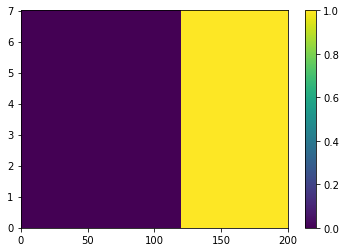

In [26]:
l = np.linspace(0, 7, 500)
w = np.linspace(0, 200, 500)
ww, ll = np.meshgrid(w, l)

autonomous_p = np.zeros_like(ww,dtype='int32')
degenerate_p = autonomous_p.copy()
degenerate_p[:, 300:] = 1
plt.pcolormesh(ww, ll, degenerate_p, shading='auto')
plt.colorbar()
plt.show()

Profile the pricers

In [27]:
from cython_ppricer import cython_pricer_naive
from cython_ppricer import pricer_naive
from cython_ppricer import cython_pricer_optimized

Timing the single collection cycle

In [9]:
%%timeit
cython_pricer_optimized.single_collection_fast(sample_acc, ww, ll, autonomous_p, c_params, np.array([0, 0.2]))

134 µs ± 1.11 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [11]:
%%timeit
cython_pricer_optimized.single_collection(sample_acc, ww, ll, autonomous_p, c_params, np.array([0, 0.2]))

164 µs ± 1.88 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [12]:
%%timeit
cython_pricer_naive.single_collection(sample_acc, ww, ll, autonomous_p, params, np.array([0, 0.2]))

235 µs ± 973 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [13]:
%%timeit
pricer_naive.single_collection(sample_acc, ww, ll, autonomous_p, params, np.array([0, 0.2]))

247 µs ± 5.33 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Timing the full valuation

In [15]:
%%timeit
cython_pricer_optimized.value_account(sample_acc, ww, ll, autonomous_p, c_params, np.array([0, 0.2]), n_iterations=10000)

1.58 s ± 7.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
%%timeit
cython_pricer_naive.value_account(sample_acc, ww, ll, autonomous_p, params, np.array([0, 0.2]), n_iterations=10000)

2.3 s ± 8.54 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
%%timeit
pricer_naive.value_account(sample_acc, ww, ll, autonomous_p, params, np.array([0, 0.2]), n_iterations=10000)

2.55 s ± 246 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
res = np.asarray(cython_pricer_optimized.value_account(sample_acc, ww, ll, autonomous_p, c_params, np.array([0, 0.2]), n_iterations=10000))
np.mean(res)

107.68750388473892

In [28]:
ython_pricer_optimized.value_account(sample_acc, ww, ll, degenerate_p, c_params, np.array([0, 0.2]), n_iterations=10000)

NameError: name 'ython_pricer_optimized' is not defined

In [19]:
res = pricer_naive.value_account(sample_acc, ww, ll, autonomous_p, params, np.array([0, 0.2]), n_iterations=10000)
np.mean(res)

108.2075

In [20]:
sample_acc = np.array([0.2, 200])
aav.u(sample_acc[0], sample_acc[1])

-111.16797478077257